In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
class NonstationaryBandit:
    def __init__(self, n_arms, decay_factor=0.9):
        self.n_arms = n_arms
        self.decay_factor = decay_factor
        self.counts = np.zeros(n_arms)  # Number of times each arm has been pulled
        self.values = np.zeros(n_arms)  # Estimated value for each arm
        self.total_counts = 0  # Total number of times an arm has been pulled

    def select_arm(self):
        # Use an adaptation of the Upper Confidence Bound (UCB) algorithm
        ucb_values = np.zeros(self.n_arms)
        for i in range(self.n_arms):
            if self.counts[i] == 0:
                # Encourage exploring arms that haven't been pulled yet
                return i
            ucb_values[i] = self.values[i] + np.sqrt((2 * np.log(self.total_counts + 1)) / self.counts[i])
        
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        # Update counts and values with a decay factor to emphasize recent rewards
        self.total_counts += 1
        self.counts[chosen_arm] += 1
        # Update the estimated value of the chosen arm using a discount factor for old data
        old_value = self.values[chosen_arm]
        self.values[chosen_arm] = old_value * self.decay_factor + (1 - self.decay_factor) * reward

In [34]:
# Function to randomly change the reward distribution of selected arms
def generate_rewards_with_random_arm_change(rewards, change_prob=0.1):
    new_rewards = rewards.copy()
    for arm in range(len(rewards)):
        if np.random.rand() < change_prob:
            new_rewards[arm] = np.random.rand()  # Randomly update the reward for this arm
    return new_rewards

In [35]:
# Simulating a Nonstationary Bandit Problem

n_arms = 5
n_iterations = 1000
decay_factor = 0.95
change_prob = 0.1

# Create a bandit problem instance
bandit = NonstationaryBandit(n_arms, decay_factor)

# Lists to track rewards, selected arms, estimated values, and true rewards
rewards = []
selected_arms = []
estimated_values = np.zeros((n_iterations, n_arms))
true_rewards = np.random.rand(n_arms)  # Initial reward probabilities for each arm
true_reward_history = np.zeros((n_iterations, n_arms))

for t in range(n_iterations):
    # Track the true rewards over time
    true_reward_history[t] = true_rewards

    # Choose an arm
    chosen_arm = bandit.select_arm()
    selected_arms.append(chosen_arm)

    # Get a reward based on the current true reward probability of the chosen arm
    reward = 1 if np.random.rand() < true_rewards[chosen_arm] else 0
    rewards.append(reward)

    # Update the bandit with the observed reward
    bandit.update(chosen_arm, reward)

    # Track estimated values for each arm
    estimated_values[t] = bandit.values

    # Update true rewards dynamically by changing some arms
    true_rewards = generate_rewards_with_random_arm_change(true_rewards, change_prob)

In [36]:
# Function to plot results
def plot_results(estimated_values, rewards, true_reward_history):
    n_iterations, n_arms = estimated_values.shape

    # Plot estimated values for each arm over time
    plt.figure(figsize=(14, 6))
    for i in range(n_arms):
        plt.plot(estimated_values[:, i], label=f'Estimated Value of Arm {i}')
    plt.xlabel('Iteration')
    plt.ylabel('Estimated Reward')
    plt.title('Estimated Reward Values of Each Arm Over Time')
    plt.legend()
    plt.show()

    # Plot average exploration reward over time
    plt.figure(figsize=(14, 6))
    plt.plot(np.cumsum(rewards) / (np.arange(n_iterations) + 1), label='Average Exploration Reward')
    plt.xlabel('Iteration')
    plt.ylabel('Average Reward')
    plt.title('Average Exploration Reward Over Time')
    plt.legend()
    plt.show()

    # Plot true reward values over time
    plt.figure(figsize=(14, 6))
    for i in range(n_arms):
        plt.plot(true_reward_history[:, i], label=f'True Reward of Arm {i}', linestyle='--')
    plt.xlabel('Iteration')
    plt.ylabel('True Reward Probability')
    plt.title('True Reward Values of Each Arm Over Time')
    plt.legend()
    plt.show()

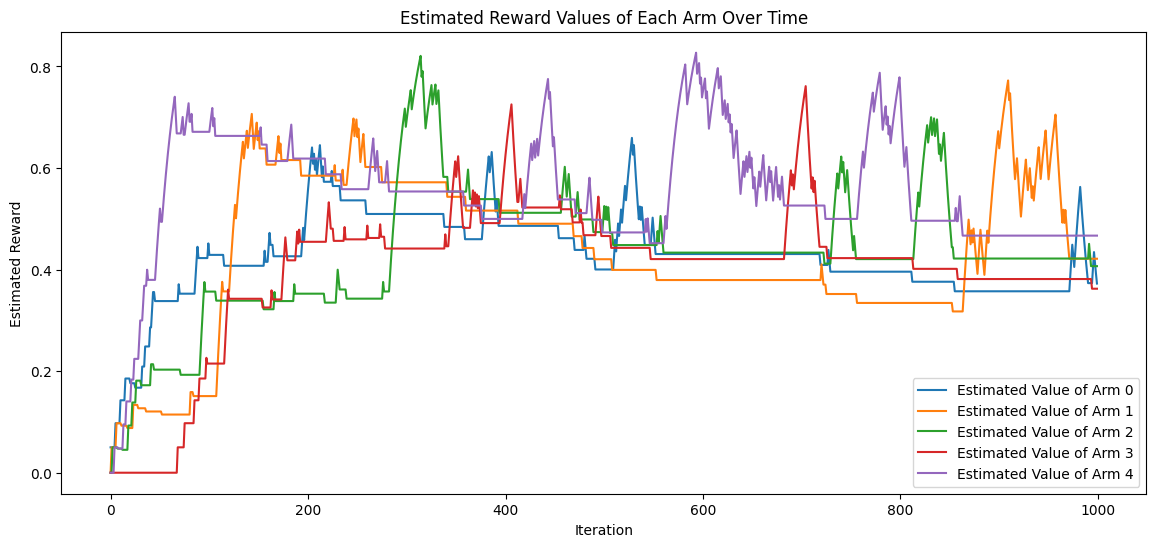

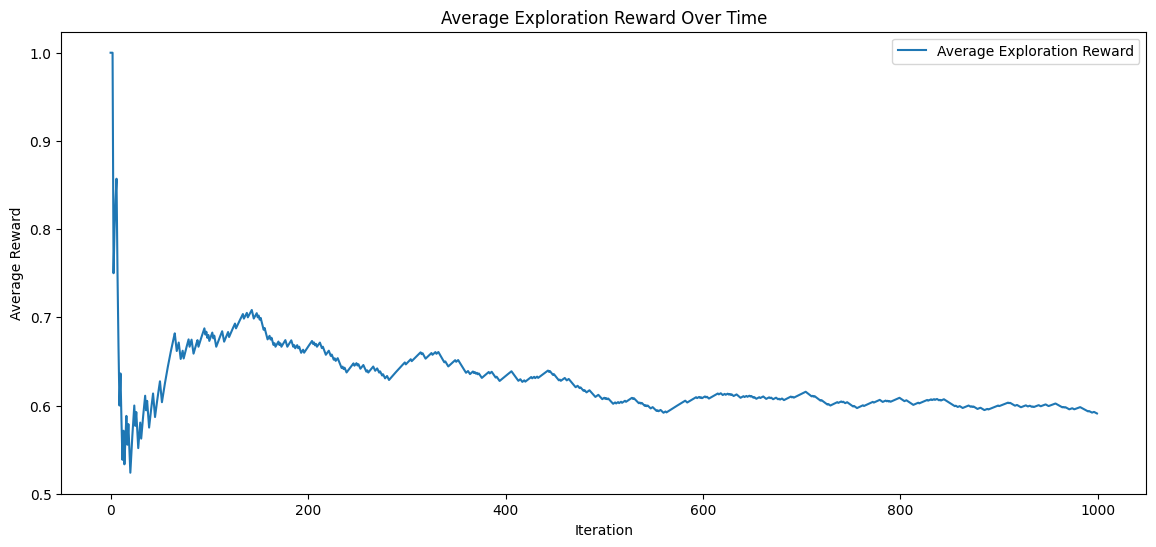

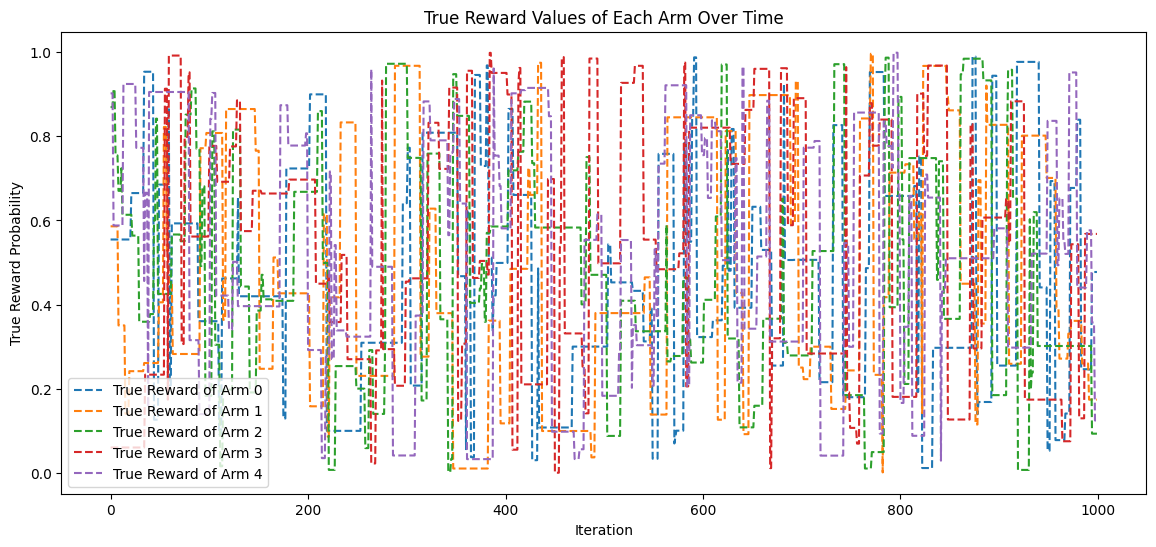

In [37]:
# Plot the results
plot_results(estimated_values, rewards, true_reward_history)